In [2]:
!pip install numpy pandas seaborn matplotlib nltk scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Libraries
In this section, we import the necessary libraries for data handling, visualization, text processing, and machine learning. We also suppress warnings for cleaner output.


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
import nltk
import string
import json
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')


# Download NLTK Data
Here, we ensure that the required NLTK data (stopwords, wordnet) is downloaded and available for use.


In [4]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kingk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kingk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kingk\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Load Datasets
In this section, we load the train and test datasets from CSV files and display basic information about them. We also drop the 'genre' column from the test set as it should be predicted.


In [5]:
# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display basic information about the train and test datasets
print("Train DataFrame Head:")
print(train.head())
print("Train DataFrame Info:")
print(train.info())
print("Test DataFrame Tail:")
print(test.tail(5))

# Drop the 'genre' column from the test set as it should be predicted
test.drop('genre', axis=1, inplace=True)


Train DataFrame Head:
      id                                         movie_name  \
0  44978                                           Super Me   
1  50185                                     Entity Project   
2  34131  Behavioral Family Therapy for Serious Psychiat...   
3  78522                                      Blood Glacier   
4   2206                                      Apat na anino   

                                            synopsis    genre  
0  A young scriptwriter starts bringing valuable ...  fantasy  
1  A director and her friends renting a haunted h...   horror  
2  This is an educational video for families and ...   family  
3  Scientists working in the Austrian Alps discov...    scifi  
4  Buy Day - Four Men Widely - Apart in Life - By...   action  
Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   

# Count and Display Number of Movies in Each Genre
In this section, we count the number of movies in each genre and display the results in plain text using pandas.


Number of movies in each genre:
genre
fantasy      5400
horror       5400
family       5400
scifi        5400
action       5400
crime        5400
adventure    5400
mystery      5400
romance      5400
thriller     5400
Name: count, dtype: int64


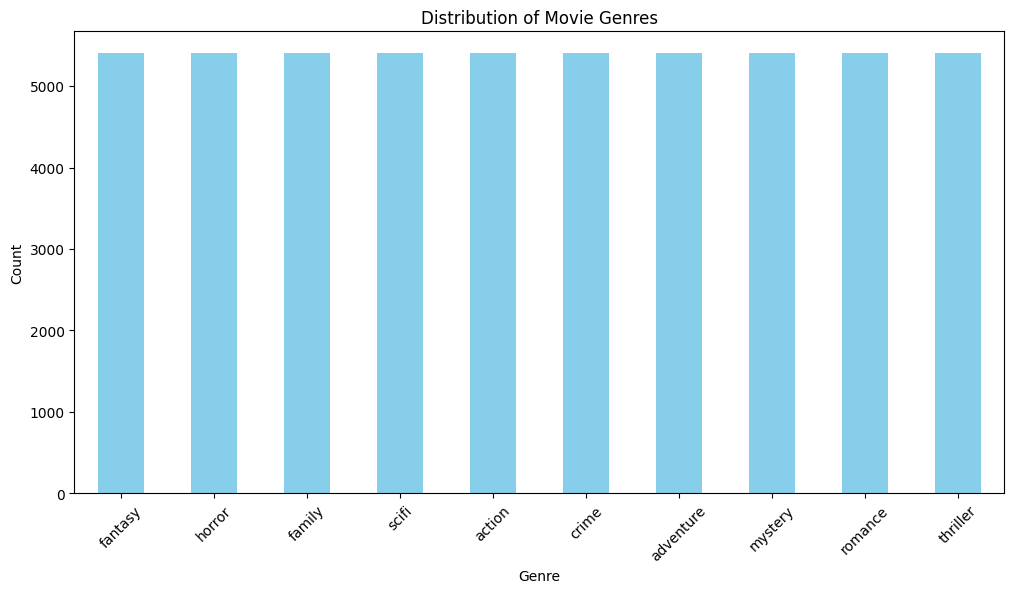

In [6]:
# Count the number of movies in each genre
genre_counts = train['genre'].value_counts()

# Display the counts in plain text
print("Number of movies in each genre:")
print(genre_counts)

# Plot the distribution of movie genres in the train dataset
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Define Text Cleaning Function
In this section, we define a function to clean the text by removing URLs, apostrophes, non-alphabetic characters, extra spaces, and converting text to lowercase. We also lemmatize words to their base form.


In [7]:
# Define a function to clean the text
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub("\'", "", text)  # Remove apostrophes
    text = re.sub("[^a-zA-Z]", " ", text)  # Remove non-alphabetic characters
    text = ' '.join(text.split())  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatize words
    return text

print("Text Cleaned")


Text Cleaned


# Clean Test Data
Here, we apply the text cleaning function to the 'synopsis' column in the test dataset.


In [8]:
# Clean the text in the 'synopsis' column of the test dataframe
test['plot'] = test['synopsis'].apply(lambda x: clean_text(x))


# Define Frequency Plot Function
This section defines a function to plot the most frequent words in a given text column using a bar plot.


In [9]:
# Define a function to plot the most frequent words
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})
    d = words_df.nlargest(columns="count", n=terms)
    plt.figure(figsize=(12, 15))
    ax = sns.barplot(data=d, x="count", y="word")
    ax.set(ylabel='Word')
    plt.show()


# Plot Frequent Words in Test Data
We use the frequency plot function to visualize the most frequent words in the cleaned 'plot' column of the test dataset.


MOST FREQUENT WORDS IN THE PLOT


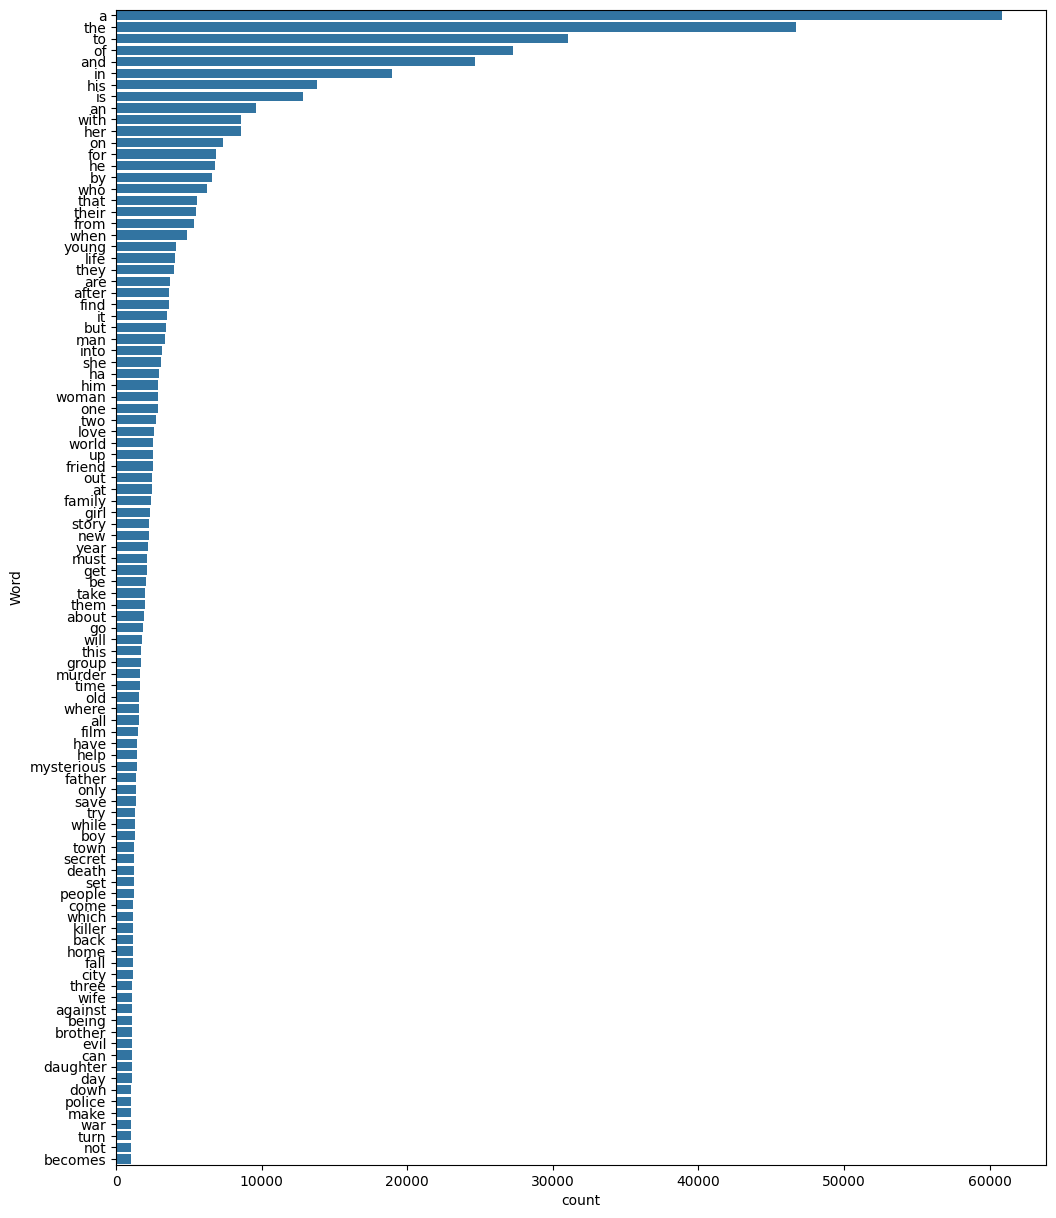

In [10]:
# Plot the most frequent words in the 'plot' column of the test dataframe
print("MOST FREQUENT WORDS IN THE PLOT")
freq_words(test['plot'], 100)


# Remove Stopwords and Lemmatize
In this section, we define a function to remove custom stopwords and lemmatize words. We then apply this function to the 'plot' column in the train dataset.


In [11]:
# Perform lemmatization on the 'plot' column of the train dataframe
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

if 'plot' not in train.columns:
    train['plot'] = train['synopsis']

# Apply the text cleaning from cell [29] first, then lemmatize
train['plot'] = train['synopsis'].apply(lambda x: clean_text(x))
train['plot'] = train['plot'].apply(lambda x: lemmatize_text(x))

print("TEXT LEMMATIZED")
print(train.head())

TEXT LEMMATIZED
      id                                         movie_name  \
0  44978                                           Super Me   
1  50185                                     Entity Project   
2  34131  Behavioral Family Therapy for Serious Psychiat...   
3  78522                                      Blood Glacier   
4   2206                                      Apat na anino   

                                            synopsis    genre  \
0  A young scriptwriter starts bringing valuable ...  fantasy   
1  A director and her friends renting a haunted h...   horror   
2  This is an educational video for families and ...   family   
3  Scientists working in the Austrian Alps discov...    scifi   
4  Buy Day - Four Men Widely - Apart in Life - By...   action   

                                                plot  
0  a young scriptwriter start bringing valuable o...  
1  a director and her friend renting a haunted ho...  
2  this is an educational video for family and fa

# Plot Frequent Words After Cleaning
We visualize the most frequent words in the cleaned 'plot' column of the train dataset after removing stopwords.


FREQUENT WORDS AFTER REMOVING STOP WORDS


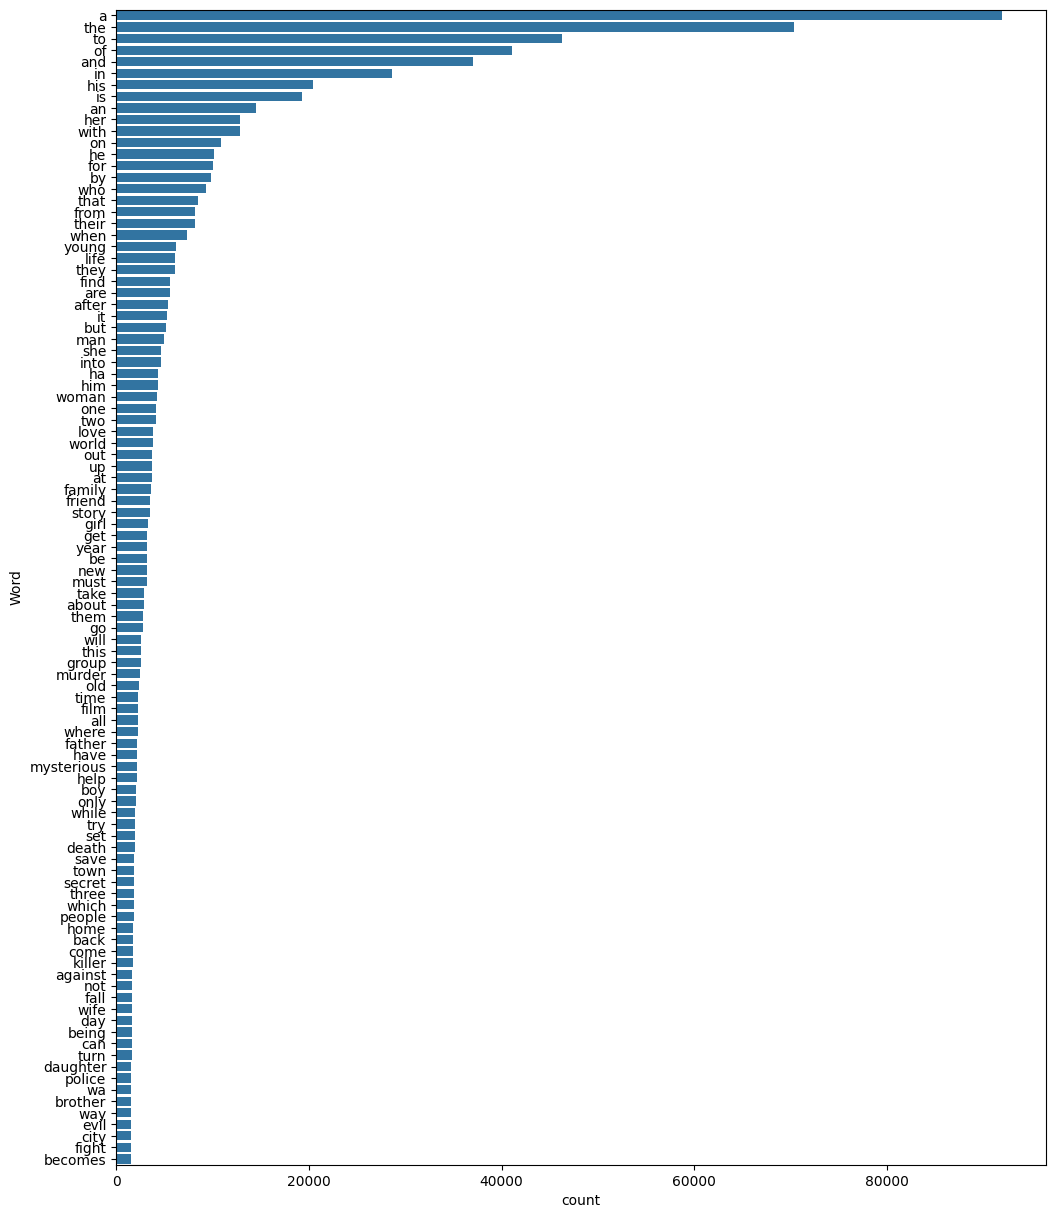

In [12]:
# Plot the most frequent words in the 'plot' column of the train dataframe after stopwords removal
print("FREQUENT WORDS AFTER REMOVING STOP WORDS")
freq_words(train['plot'], 100)


# Vectorize Text
This section uses a TF-IDF vectorizer to convert the text data into a numerical format suitable for machine learning models.


In [13]:
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),
    max_features=30000  # Keep only the 30,000 most common terms
)

X_train = tfidf_vectorizer.fit_transform(train['plot'])
X_test = tfidf_vectorizer.transform(test['plot'])

# Train Classifier
We train a Multinomial Naive Bayes classifier on the vectorized train data.


In [14]:
# Train a Multinomial Naive Bayes classifier
y_train = train['genre']
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


# Predict Genres
In this section, we predict genres for the test dataset and save the predictions to a CSV file. We also display the first 10 rows of the predictions.


In [15]:
# Predict the genres for the test dataset
X_test_predictions = classifier.predict(X_test)
test['Predicted Genre'] = X_test_predictions

# Save the predictions to a CSV file
test.to_csv('predicted_genre.csv', index=False)
print("Predictions saved to 'predicted_genre.csv'")

# Display the first 10 rows of the predictions
print("First 'n' rows of predictions:")
print(test.head(3))


Predictions saved to 'predicted_genre.csv'
First 'n' rows of predictions:
      id        movie_name                                           synopsis  \
0  16863  A Death Sentence  12 y.o. Ida's dad'll die without a DKK1,500,00...   
1  48456        Intermedio  A group of four teenage friends become trapped...   
2  41383  30 Chua Phai Tet  A guy left his home for 12 years till he came ...   

                                                plot Predicted Genre  
0  y o ida dadll die without a dkk operation ida ...           crime  
1  a group of four teenage friend become trapped ...          horror  
2  a guy left his home for year till he came back...          family  


# Hyperparameter Tuning
We use GridSearchCV to find the best hyperparameters for the Multinomial Naive Bayes classifier. The best classifier and its score are then displayed.


In [16]:
# Perform hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator and its score
best_classifier = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_classifier)
print("Best Score:", best_score)


Best Estimator: MultinomialNB(alpha=2.0)
Best Score: 0.3610555555555555


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
    ('clf', MultinomialNB())
])

param_grid = {
    'tfidf__min_df': [1, 3],
    'tfidf__max_df': [0.9, 0.95],
    'clf__alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')
grid.fit(train['plot'], y_train)

print("Best Model:", grid.best_estimator_)
print("Best Score:", grid.best_score_)


Best Model: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', MultinomialNB(alpha=5.0))])
Best Score: 0.35003955416416693
